# Data Analytics Bootcamp - Project 1

## A. General Analysis on Life expectancy in the American Regions

This analysis is looking at the life expectancy of four different regions: North America, Central America, South America and the Caribbean. The dataset is the same which was used in the other analysis of the team, with the difference that the regions are pre-filtered for this analysis. 

In [1]:
%matplotlib notebook

### 1. Importing Dependencies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

### 2. Loading dataset into the notebook 

In [3]:
# Research data files
america_path = "Resources/datafile2_per_region.csv"

# Read the mouse data and the study results
america_data = pd.read_csv(america_path)

america_data

,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income Composition of Resources,Schooling,Region
0,Canada,2014,Developing,82.0,65,2,8.10,102.190217,55,418,...,2,91,1.45,91,0.1,544.43376,35544564.0,0.912,15.9,North America
1,Canada,2013,Developing,81.8,67,2,8.20,9733.228019,55,83,...,2,91,1.67,91,0.1,52413.72116,35155451.0,0.909,15.9,North America
2,Canada,2012,Developing,81.6,68,2,8.30,9748.636237,7,10,...,2,99,1.78,95,0.1,52496.69487,3475545.0,0.907,15.9,North America
3,Canada,2011,Developing,81.5,68,2,8.20,971.928038,7,803,...,2,87,1.82,87,0.1,5282.21760,3434278.0,0.903,15.9,North America
4,Canada,2010,Developing,81.2,7,2,8.40,8649.674911,56,99,...,2,88,11.20,89,0.1,47447.47620,345274.0,0.898,15.9,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Trinidad and Tobago,2008,Developing,69.9,185,0,6.41,1902.693048,9,0,...,0,91,4.40,9,0.3,21188.11857,1315372.0,0.767,12.4,Caribbean
236,Trinidad and Tobago,2007,Developing,69.7,187,0,6.37,136.883668,89,0,...,0,9,4.82,88,0.7,1653.18440,13926.0,0.760,12.4,Caribbean
237,Trinidad and Tobago,2006,Developing,69.6,188,0,6.35,103.371069,89,0,...,0,89,4.49,92,0.6,1495.96337,133144.0,0.751,12.3,Caribbean
238,Trinidad and Tobago,2005,Developing,69.5,189,0,6.12,1187.949491,95,0,...,0,95,5.31,95,0.5,12323.12750,1296934.0,0.745,12.3,Caribbean


In [4]:
#america_data.describe()

# Left it out as the values did not make sense for the given data set!

### 3. Mean life expectancy across all countries per region

In [5]:
# Group the data by region and calculate the average life expectancy within each group
average_life_expectancy_by_region = america_data.groupby(['Country', 'Region'])['Life expectancy'].mean().reset_index()

# Sort the result by region in ascending order - alternative display!
#sorted_average_life_expectancy = average_life_expectancy_by_region.sort_values(ascending=True)

# Print the sorted result
#print(sorted_average_life_expectancy)

# Sort the result by region
sorted_result = average_life_expectancy_by_region.sort_values(by='Region')

# Print the sorted result
sorted_result

,Country,Region,Life expectancy
1,Belize,Caribbean,69.445455
14,Jamaica,Caribbean,74.645455
12,Haiti,Caribbean,62.900000
21,Trinidad and Tobago,Caribbean,71.745455
7,Dominican Republic,Caribbean,72.363636
17,Panama,Central America,76.690909
13,Honduras,Central America,73.409091
10,Guatemala,Central America,73.140000
9,El Salvador,Central America,72.145455
16,Nicaragua,Central America,73.036364


### 4. Actual life expectancy count - highest per region

In [6]:
## Added for min max of ACTUAL life expectancy ages

# Find the rows with the highest life expectancy within each region
highest_life_expectancy_normal = america_data.loc[america_data.groupby('Region')['Life expectancy'].idxmax()]

# Print the highest values per region
print("Highest Life Expectancy per Region:")
highest_life_expectancy_normal 

Highest Life Expectancy per Region:


,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income Composition of Resources,Schooling,Region
231,Trinidad and Tobago,2012,Developing,78.0,174,0,6.70,1486.236406,92,0,...,0,91,5.78,92,0.4,19152.53100,1341588.0,0.772,12.6,Caribbean
11,Costa Rica,2014,Developing,79.5,96,1,3.45,384.512914,91,1,...,1,91,9.31,91,0.1,1647.44179,4757575.0,0.768,13.9,Central America
6,Canada,2008,Developing,87.0,74,2,8.30,8433.936814,28,62,...,2,89,1.30,92,0.1,46596.33599,33245773.0,0.897,15.8,North America
109,Chile,2014,Developing,83.0,83,2,7.16,2352.999591,95,0,...,2,95,7.79,95,0.1,14817.37778,17613798.0,0.841,16.2,South America


### 5. Actual life expectancy count - lowest per region

In [7]:
## Added for min max of ACTUAL life expectancy ages

# Find the rows with the lowest life expectancy within each region
lowest_life_expectancy_normal = america_data.loc[america_data.groupby('Region')['Life expectancy'].idxmin()]

# Print the lowest values per region
print("Lowest Life Expectancy per Region:")
lowest_life_expectancy_normal

Lowest Life Expectancy per Region:


,Country,Year,Status,Life expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income Composition of Resources,Schooling,Region
217,Haiti,2013,Developing,62.7,253,14,5.68,4.989712,68,0,...,19,67,8.10,68,0.5,81.265673,1431776.0,0.483,9.1,Caribbean
42,Guatemala,2005,Developing,69.2,28,14,2.35,41.508456,87,0,...,18,87,6.79,87,0.4,277.834380,139628.0,0.567,9.6,Central America
10,Canada,2004,Developing,80.0,77,2,7.80,5513.329924,14,7,...,2,91,9.56,91,0.1,31979.871950,31995.0,0.881,15.8,North America
149,Guyana,2005,Developing,65.0,238,1,7.35,17.464059,93,0,...,1,93,5.83,93,1.8,198.455216,75946.0,0.619,11.4,South America


### 6. Mean life expectancy - highest per region

In [8]:
# Find the rows with the highest mean life expectancy within each region
highest_life_expectancy = average_life_expectancy_by_region.loc[average_life_expectancy_by_region.groupby('Region')['Life expectancy'].idxmax()]

# Print the highest and lowest values per region
print("\nHighest Mean Life Expectancy per Region:")
highest_life_expectancy


Highest Mean Life Expectancy per Region:


,Country,Region,Life expectancy
14,Jamaica,Caribbean,74.645455
6,Costa Rica,Central America,78.772727
3,Canada,North America,82.463636
4,Chile,South America,79.944444


### 7. Mean life expectancy - lowest per region

In [9]:
# Find the rows with the lowest mean life expectancy within each region
lowest_life_expectancy = average_life_expectancy_by_region.loc[average_life_expectancy_by_region.groupby('Region')['Life expectancy'].idxmin()]

print("\nLowest Mean Life Expectancy per Region:")
lowest_life_expectancy


Lowest Mean Life Expectancy per Region:


,Country,Region,Life expectancy
12,Haiti,Caribbean,62.900000
9,El Salvador,Central America,72.145455
3,Canada,North America,82.463636
11,Guyana,South America,65.690909


In [10]:
# Just getiing some info on the dataframe due to an error in the next code
america_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          240 non-null    object 
 1   Year                             240 non-null    int64  
 2   Status                           240 non-null    object 
 3   Life expectancy                  240 non-null    float64
 4   Adult Mortality                  240 non-null    int64  
 5   Infant Deaths                    240 non-null    int64  
 6   Alcohol                          240 non-null    float64
 7   Percentage Expenditure           240 non-null    float64
 8   Hepatitis B                      240 non-null    int64  
 9   Measles                          240 non-null    int64  
 10  BMI                              240 non-null    float64
 11  Under-Five Deaths                240 non-null    int64  
 12  Polio                 

### 8. Actual life expectancy distribution across all countries

<IPython.core.display.Javascript object>


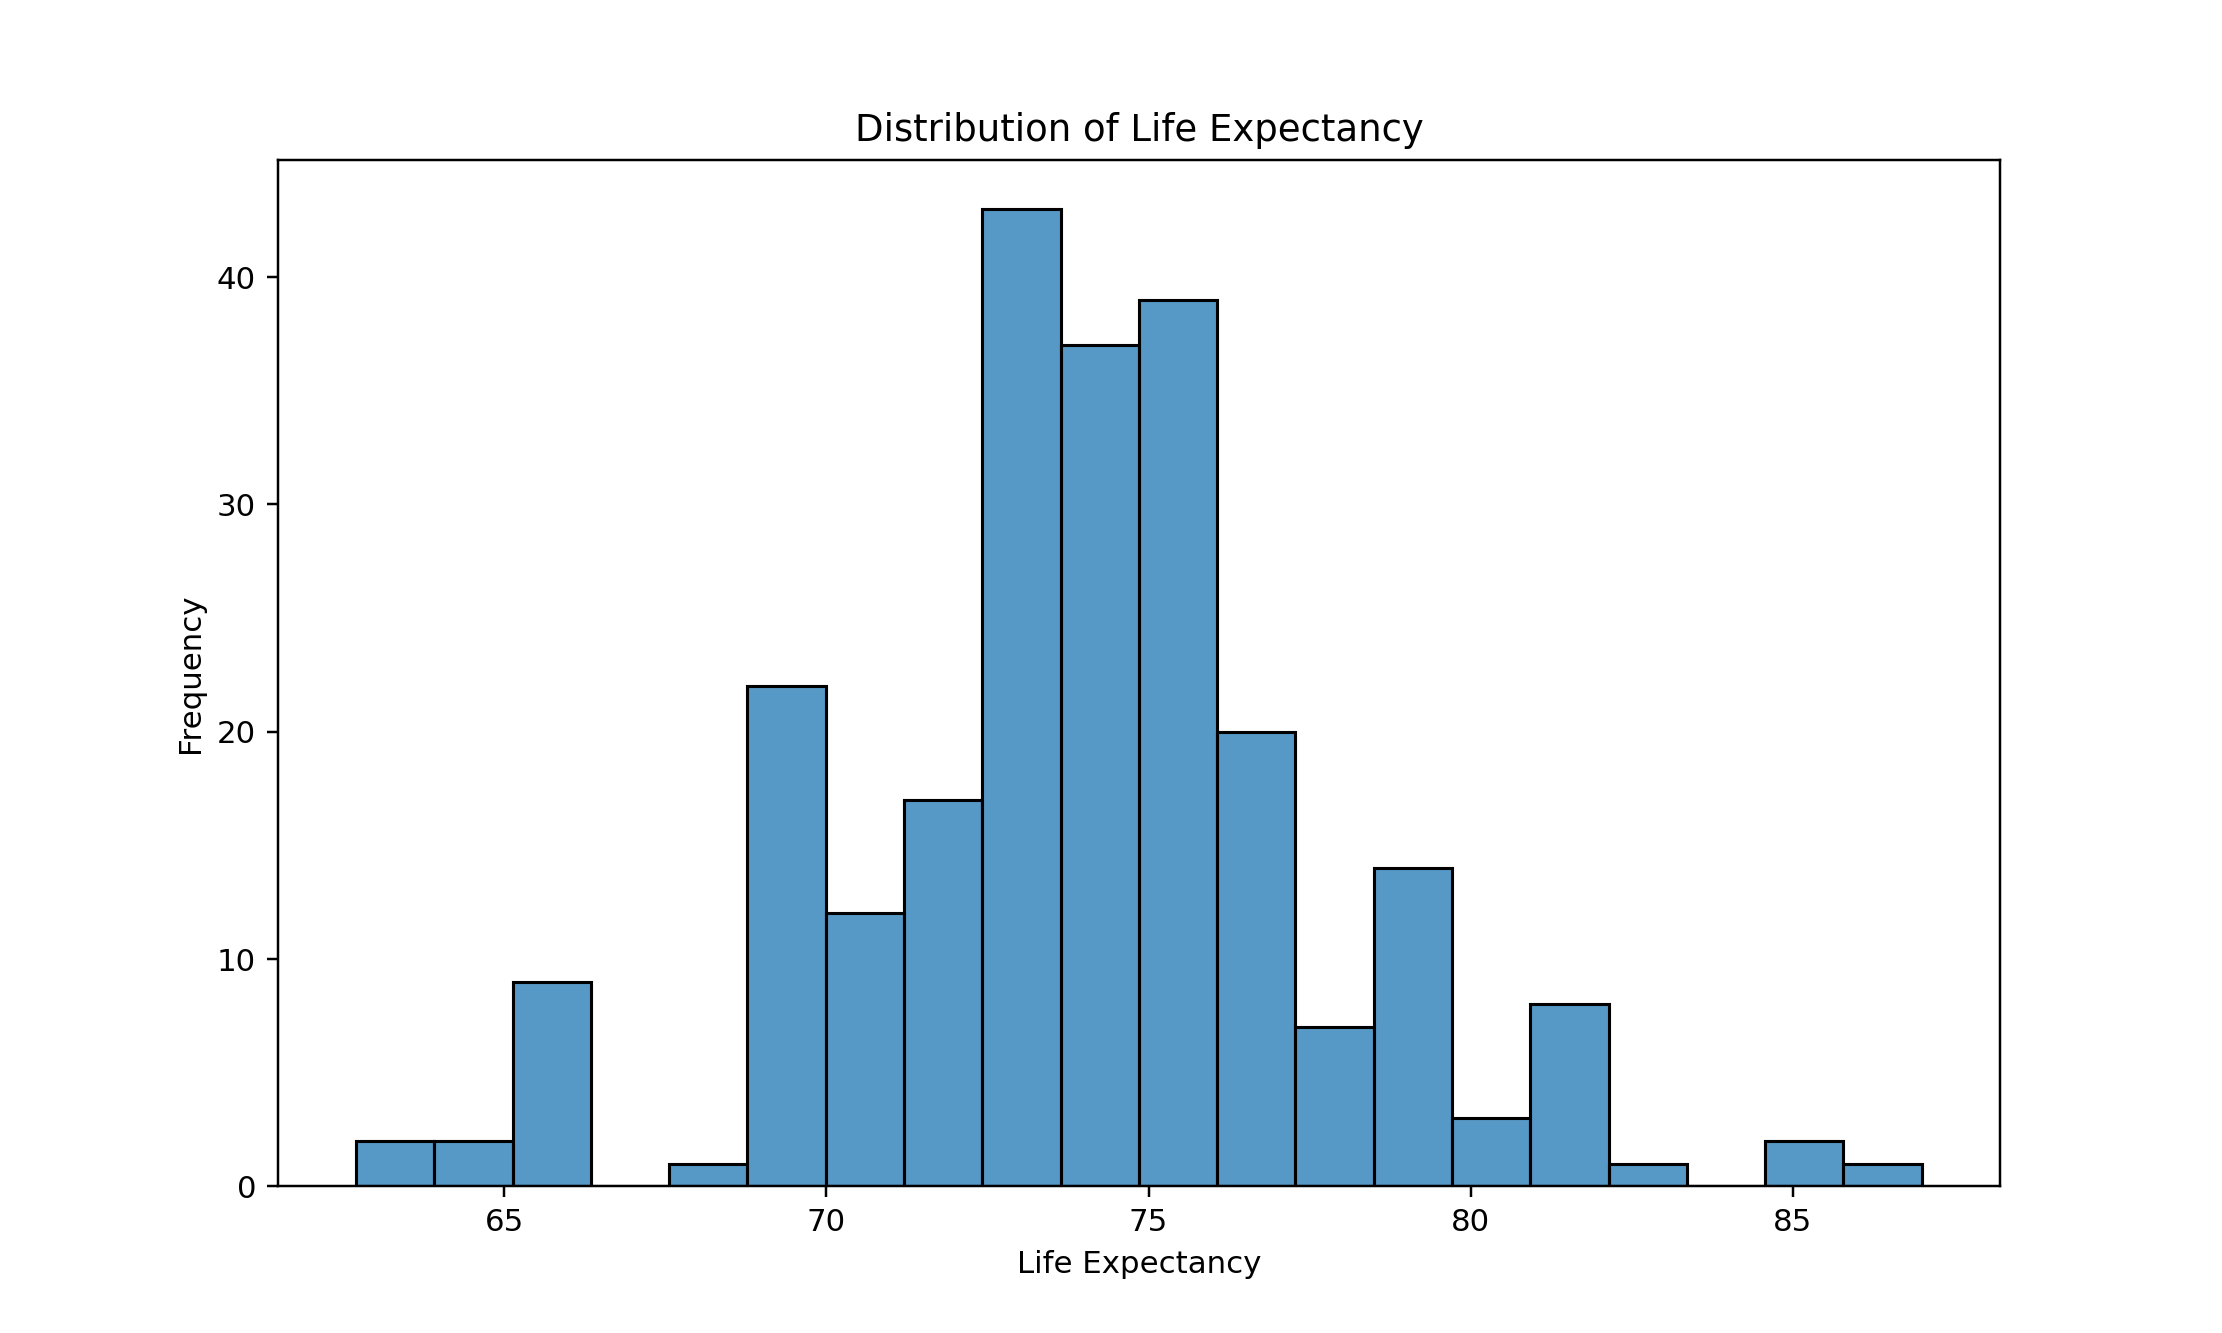

In [11]:
# Histogram of life expectancy across all countries within this dataset (actual age)
plt.figure(figsize=(10, 6))
sns.histplot(america_data['Life expectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()

## B. Scatter plots for Years vs. Life expectancy in each American region 
### 1. CARIBBEAN

<IPython.core.display.Javascript object>


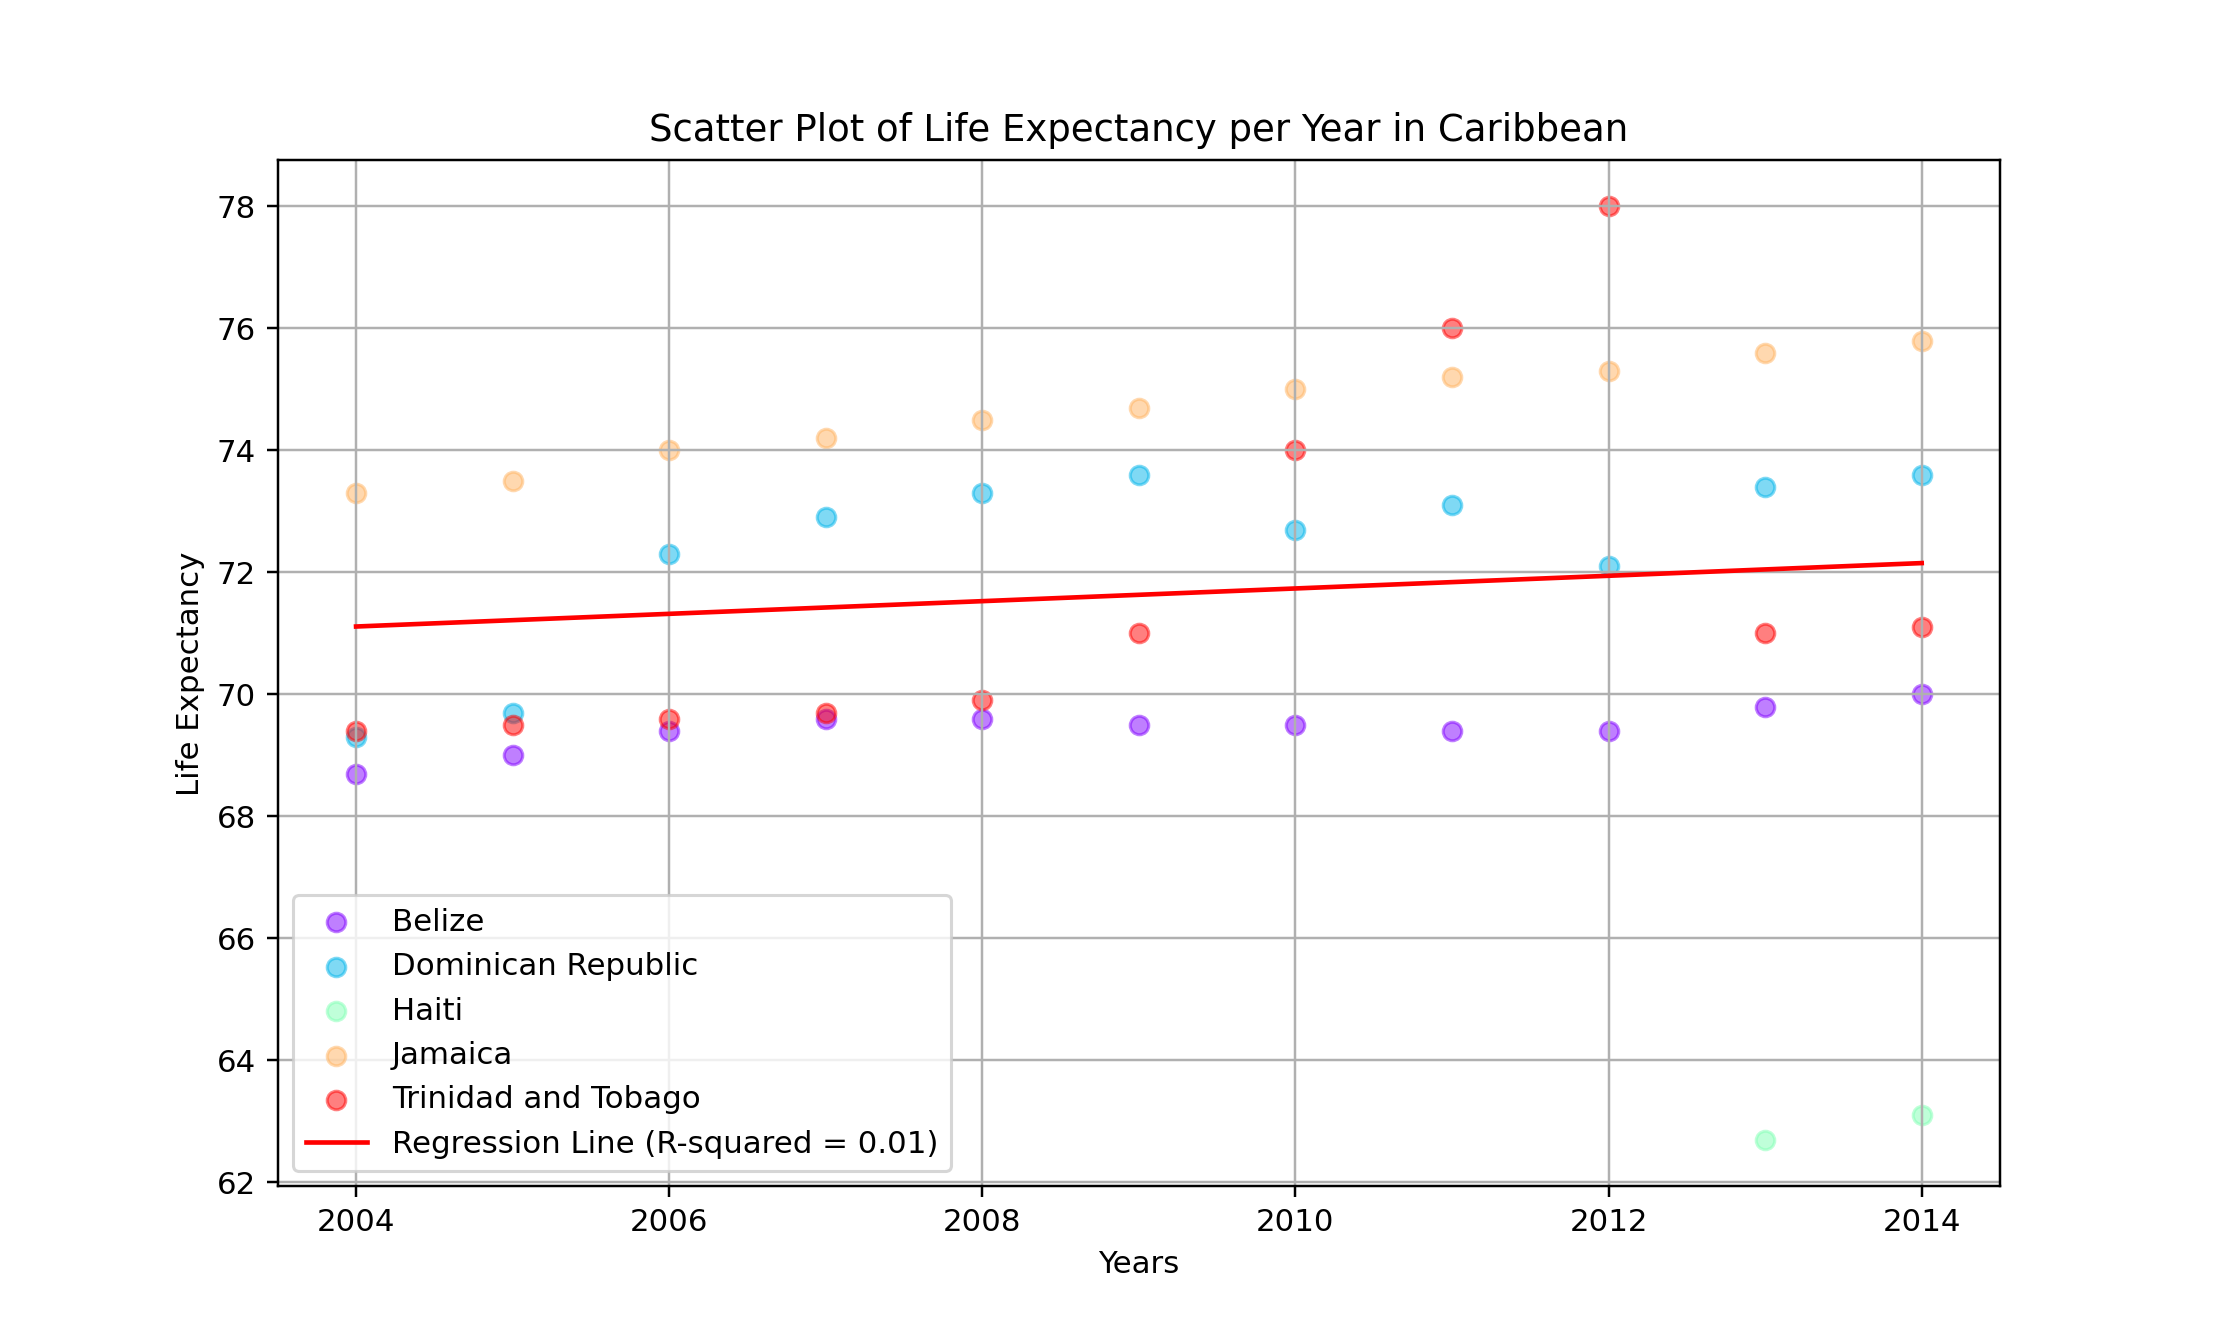

In [12]:
# Filter the data for the Caribbean region
caribbean_data = america_data[america_data['Region'] == 'Caribbean']

# Create a list of unique countries in the Caribbean region
caribbean_countries = caribbean_data['Country'].unique()

# Define a color map for the countries
colors = plt.cm.rainbow(np.linspace(0, 1, len(caribbean_countries)))

plt.figure(figsize=(10, 6))

# Iterate through each country and plot its data with a unique color
for i, country in enumerate(caribbean_countries):
    country_data = caribbean_data[caribbean_data['Country'] == country]
    plt.scatter(country_data['Year'], country_data['Life expectancy'], alpha=0.5, color=colors[i], label=country)

plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Life Expectancy per Year in Caribbean')


# Perform linear regression (you can choose to do this for all countries or just one)
slope, intercept, r_value, p_value, std_err = linregress(caribbean_data['Year'], caribbean_data['Life expectancy'])
x_values = np.linspace(min(caribbean_data['Year']), max(caribbean_data['Year']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)  
plt.legend()
plt.show()

### 2. CENTRAL AMERICA

<IPython.core.display.Javascript object>


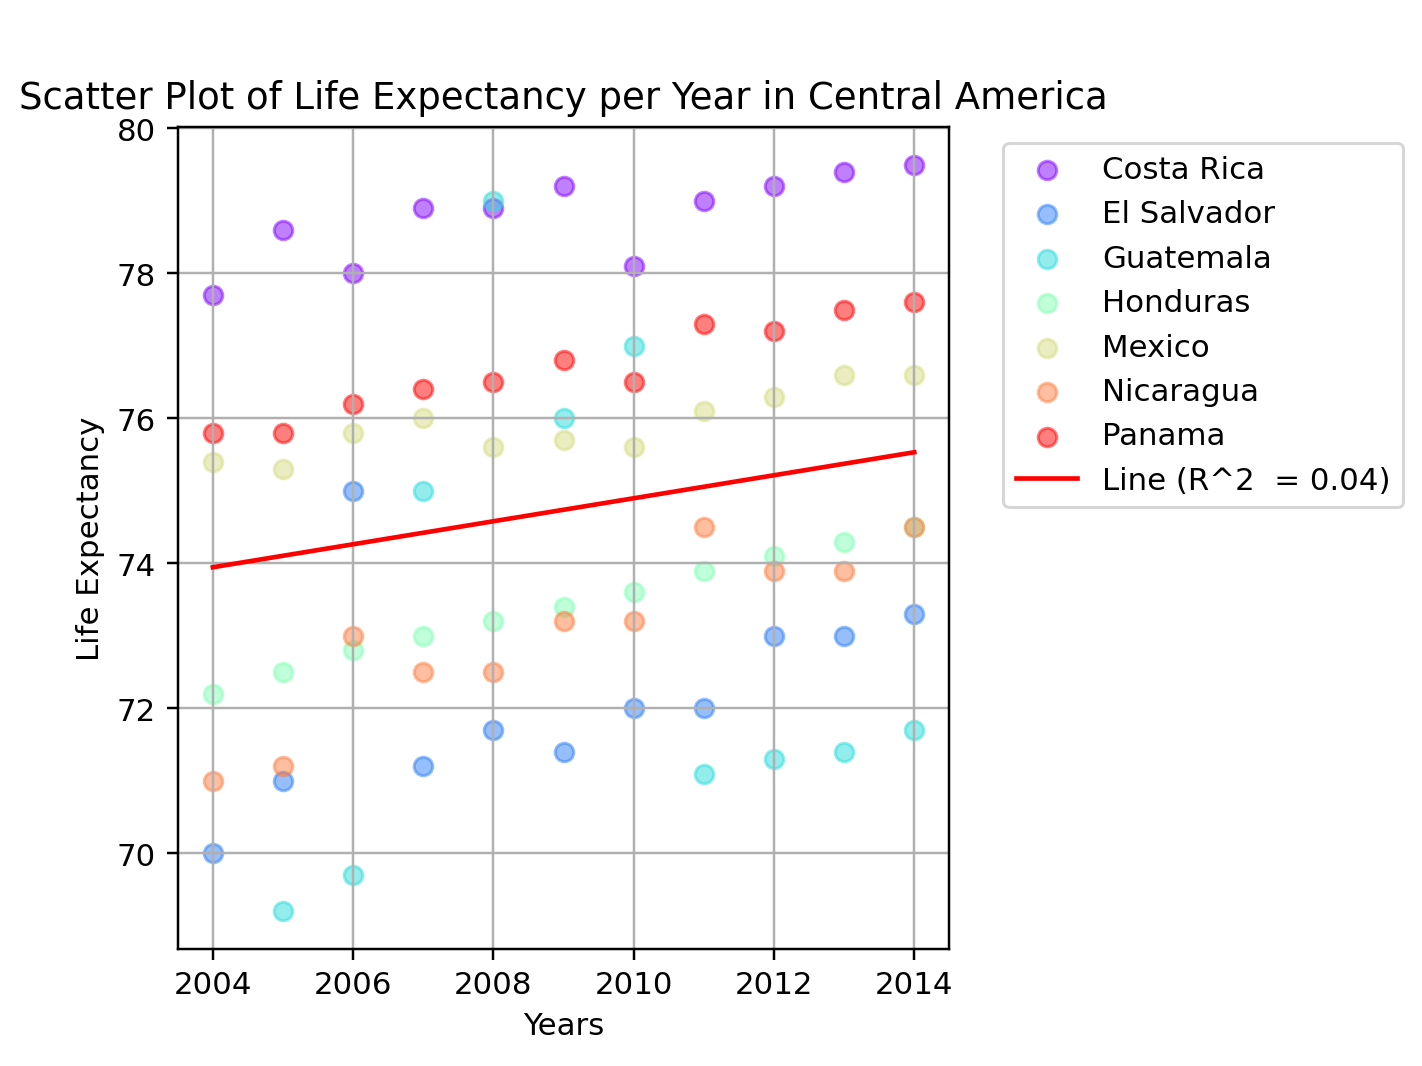

In [13]:
# Filter the data for the Central American region
central_america_data = america_data[america_data['Region'] == 'Central America']

# Create a list of unique countries in the Central American region
central_american_countries = central_america_data['Country'].unique()

# Defining ax to aid shrinking for the legend
fig = plt.figure()
ax = plt.subplot(111)

# Define a color map for the countries
colors = plt.cm.rainbow(np.linspace(0, 1, len(central_american_countries)))

#plt.figure(figsize=(10, 6))

# Iterate through each country and plot its data with a unique color
for i, country in enumerate(central_american_countries):
    country1_data = central_america_data[central_america_data['Country'] == country]
    plt.scatter(country1_data['Year'], country1_data['Life expectancy'], alpha=0.5, color=colors[i], label=country)

ax.set_xlabel('Years')
ax.set_ylabel('Life Expectancy')
ax.set_title('Scatter Plot of Life Expectancy per Year in Central America')


# Perform linear regression (you can choose to do this for all countries or just one)
slope, intercept, r_value, p_value, std_err = linregress(central_america_data['Year'], central_america_data['Life expectancy'])
x_values = np.linspace(min(central_america_data['Year']), max(central_america_data['Year']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
ax.plot(x_values, y_values, color='red', label=f'Line (R^2  = {r_value**2:.2f})')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])

ax.grid(True)  
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()

### 3. SOUTH AMERICA

<IPython.core.display.Javascript object>


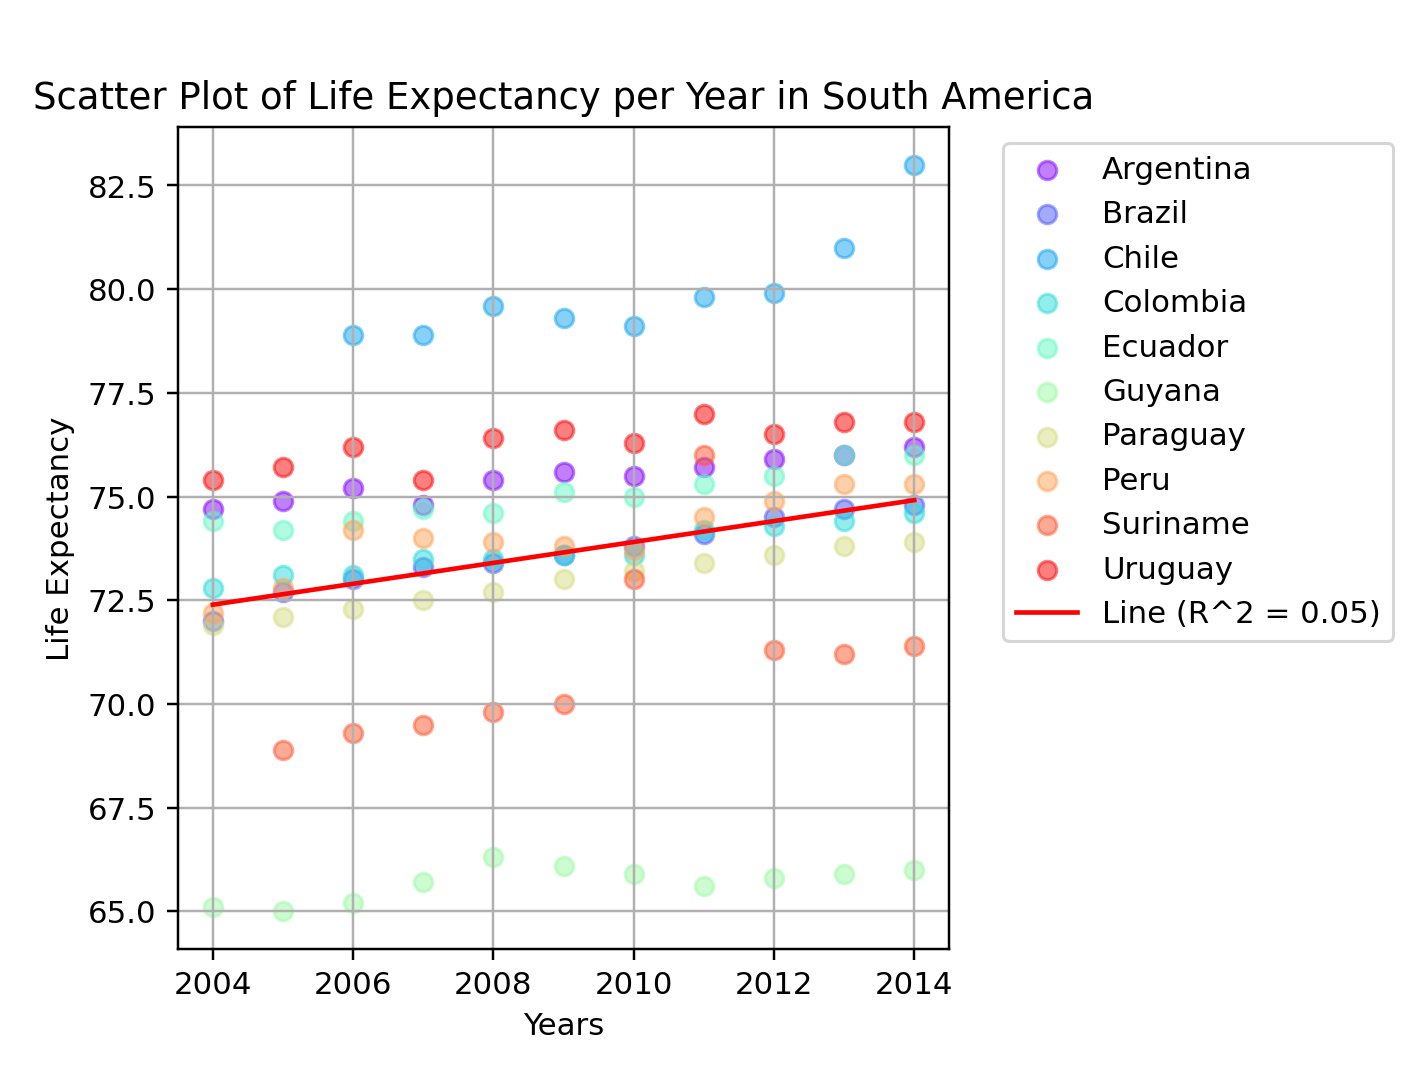

In [14]:
# Filter the data for the South American region
south_america_data = america_data[america_data['Region'] == 'South America']

# Create a list of unique countries in the South American region
south_american_countries = south_america_data['Country'].unique()

# Defining ax to aid shrinking for the legend
fig = plt.figure()
ax = plt.subplot(111)

# Define a color map for the countries
colors = plt.cm.rainbow(np.linspace(0, 1, len(south_american_countries)))

#plt.figure(figsize=(10, 6))

# Iterate through each country and plot its data with a unique color
for i, country in enumerate(south_american_countries):
    country2_data = south_america_data[south_america_data['Country'] == country]
    ax.scatter(country2_data['Year'], country2_data['Life expectancy'], alpha=0.5, color=colors[i], label=country)

ax.set_xlabel('Years')
ax.set_ylabel('Life Expectancy')
ax.set_title('Scatter Plot of Life Expectancy per Year in South America')

# Perform linear regression (you can choose to do this for all countries or just one)
slope, intercept, r_value, p_value, std_err = linregress(south_america_data['Year'], south_america_data['Life expectancy'])
x_values = np.linspace(min(central_america_data['Year']), max(south_america_data['Year']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
ax.plot(x_values, y_values, color='red', label=f'Line (R^2 = {r_value**2:.2f})')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])

ax.grid(True)  
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()

### 4. NORTH AMERICA

<IPython.core.display.Javascript object>


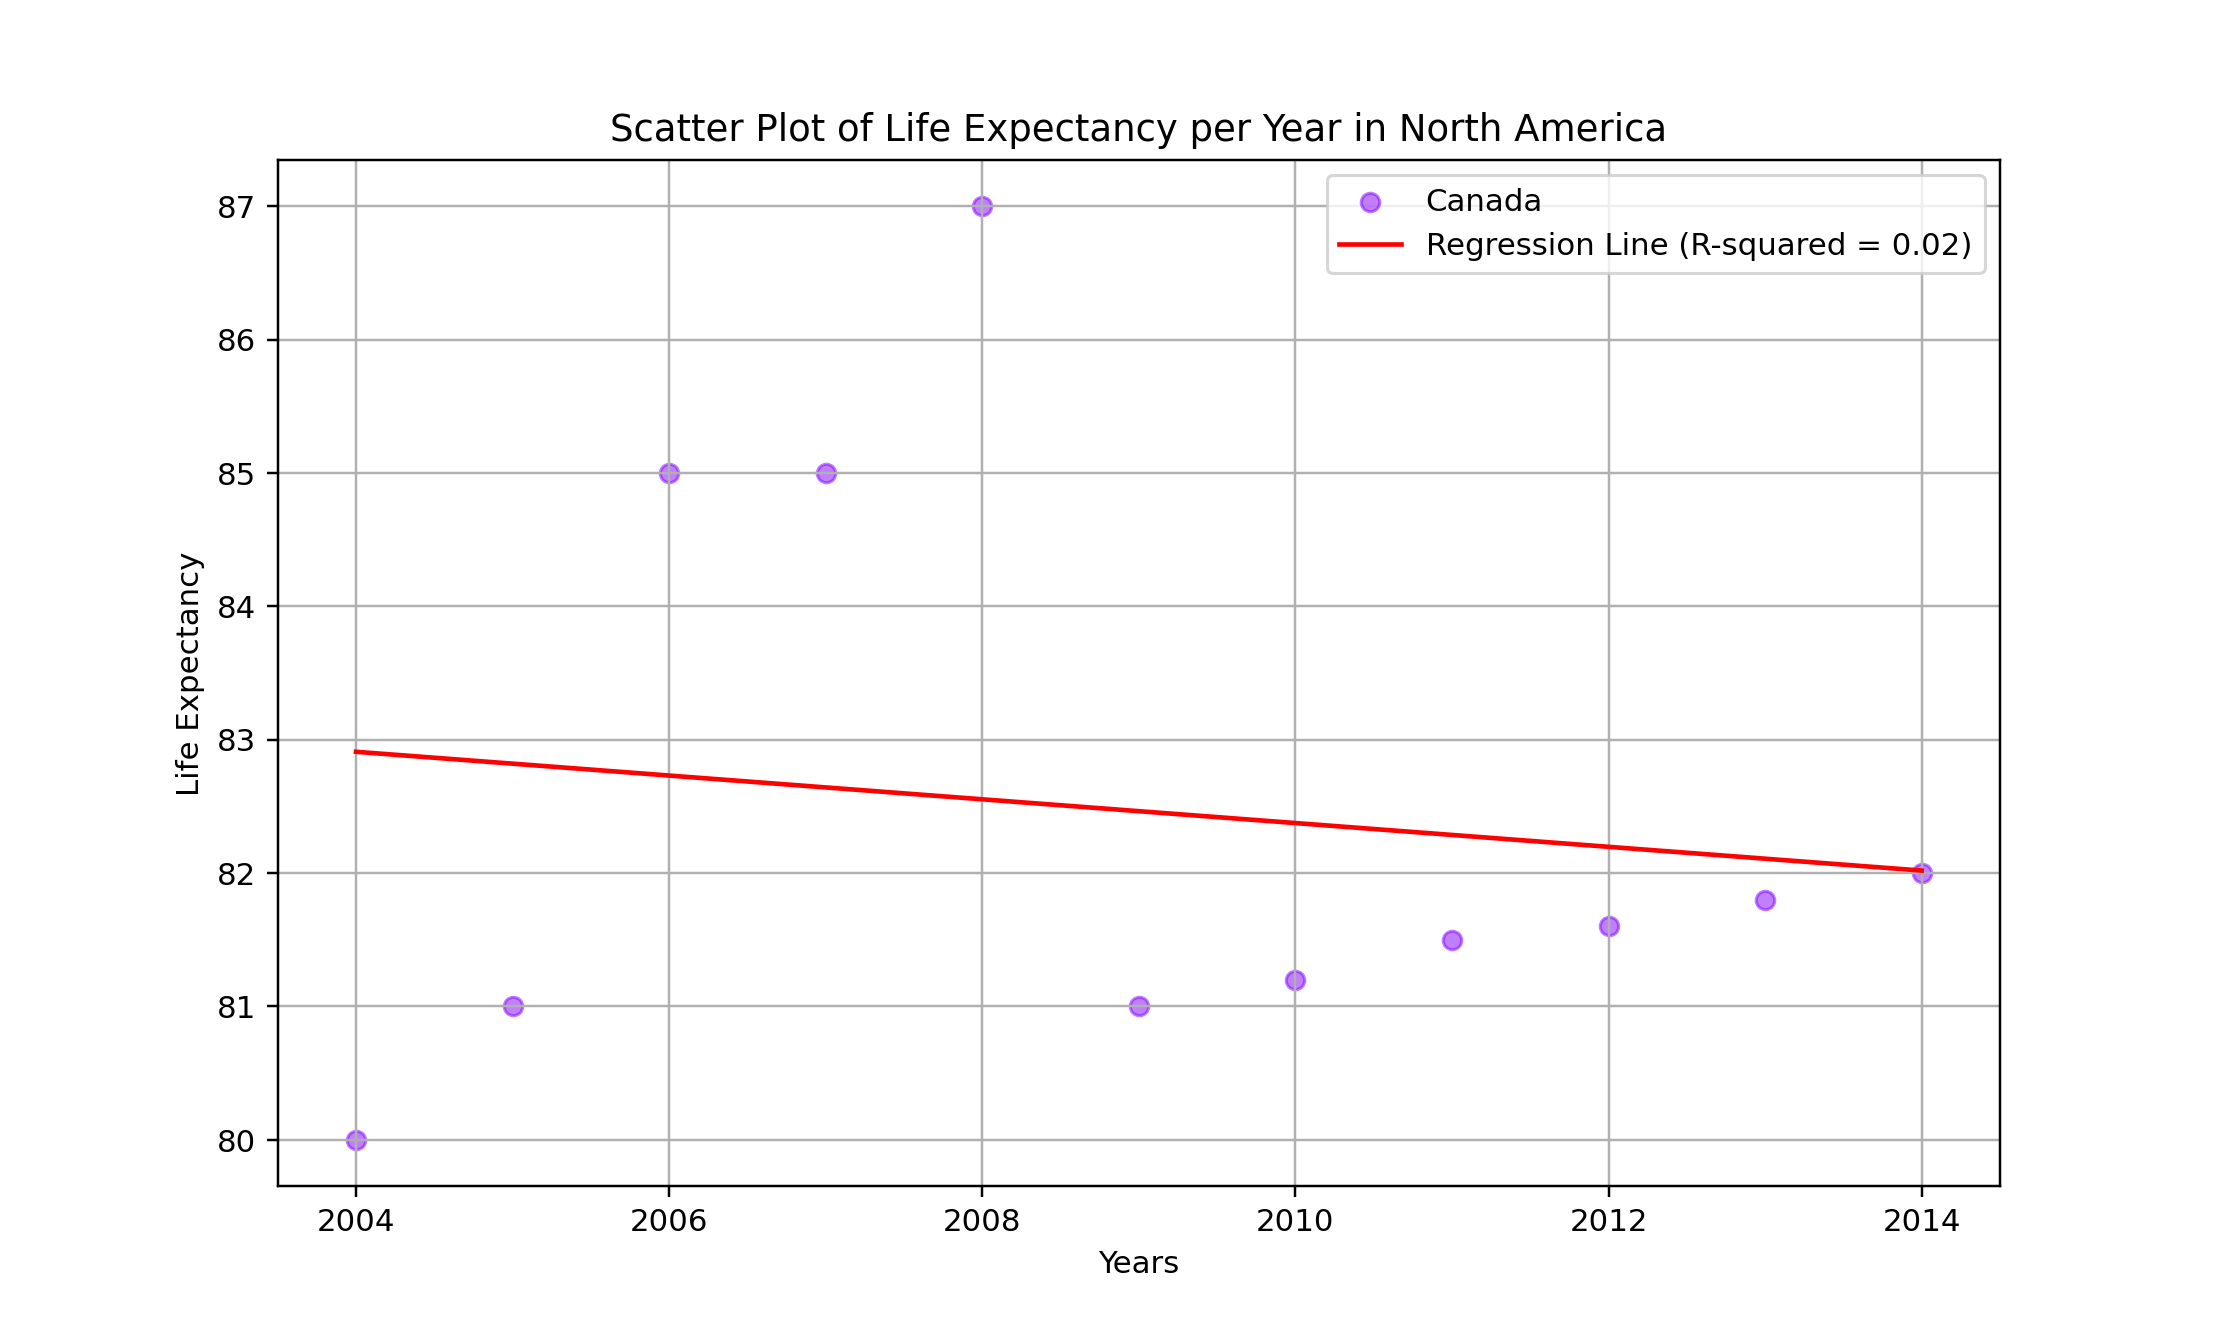

In [15]:
# Filter the data for the North American region
north_america_data = america_data[america_data['Region'] == 'North America']

# Create a list of unique countries in the North American region
north_america_countries = north_america_data['Country'].unique()

# Define a color map for the countries
colors = plt.cm.rainbow(np.linspace(0, 1, len(north_america_countries)))

plt.figure(figsize=(10, 6))

# Iterate through each country and plot its data with a unique color
for i, country in enumerate(north_america_countries):
    country_data = north_america_data[north_america_data['Country'] == country]
    plt.scatter(country_data['Year'], country_data['Life expectancy'], alpha=0.5, color=colors[i], label=country)

plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Life Expectancy per Year in North America')


# Perform linear regression (you can choose to do this for all countries or just one)
slope, intercept, r_value, p_value, std_err = linregress(north_america_data['Year'], north_america_data['Life expectancy'])
x_values = np.linspace(min(north_america_data['Year']), max(north_america_data['Year']), 100)
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Regression Line (R-squared = {r_value**2:.2f})')

plt.grid(True)  
plt.legend()
plt.show()

## C. Bonus analysis 

As a bonus analysis, we looked at the life expectancy distribution between Developing and Developed countries using a boxplot.

In [16]:
# Research data files
all_path = "Resources/datafile_per_region.csv"

# Read the mouse data and the study results
all_countries_data = pd.read_csv(all_path)

all_countries_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Region
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa
1645,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa
1646,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa
1647,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa


<IPython.core.display.Javascript object>


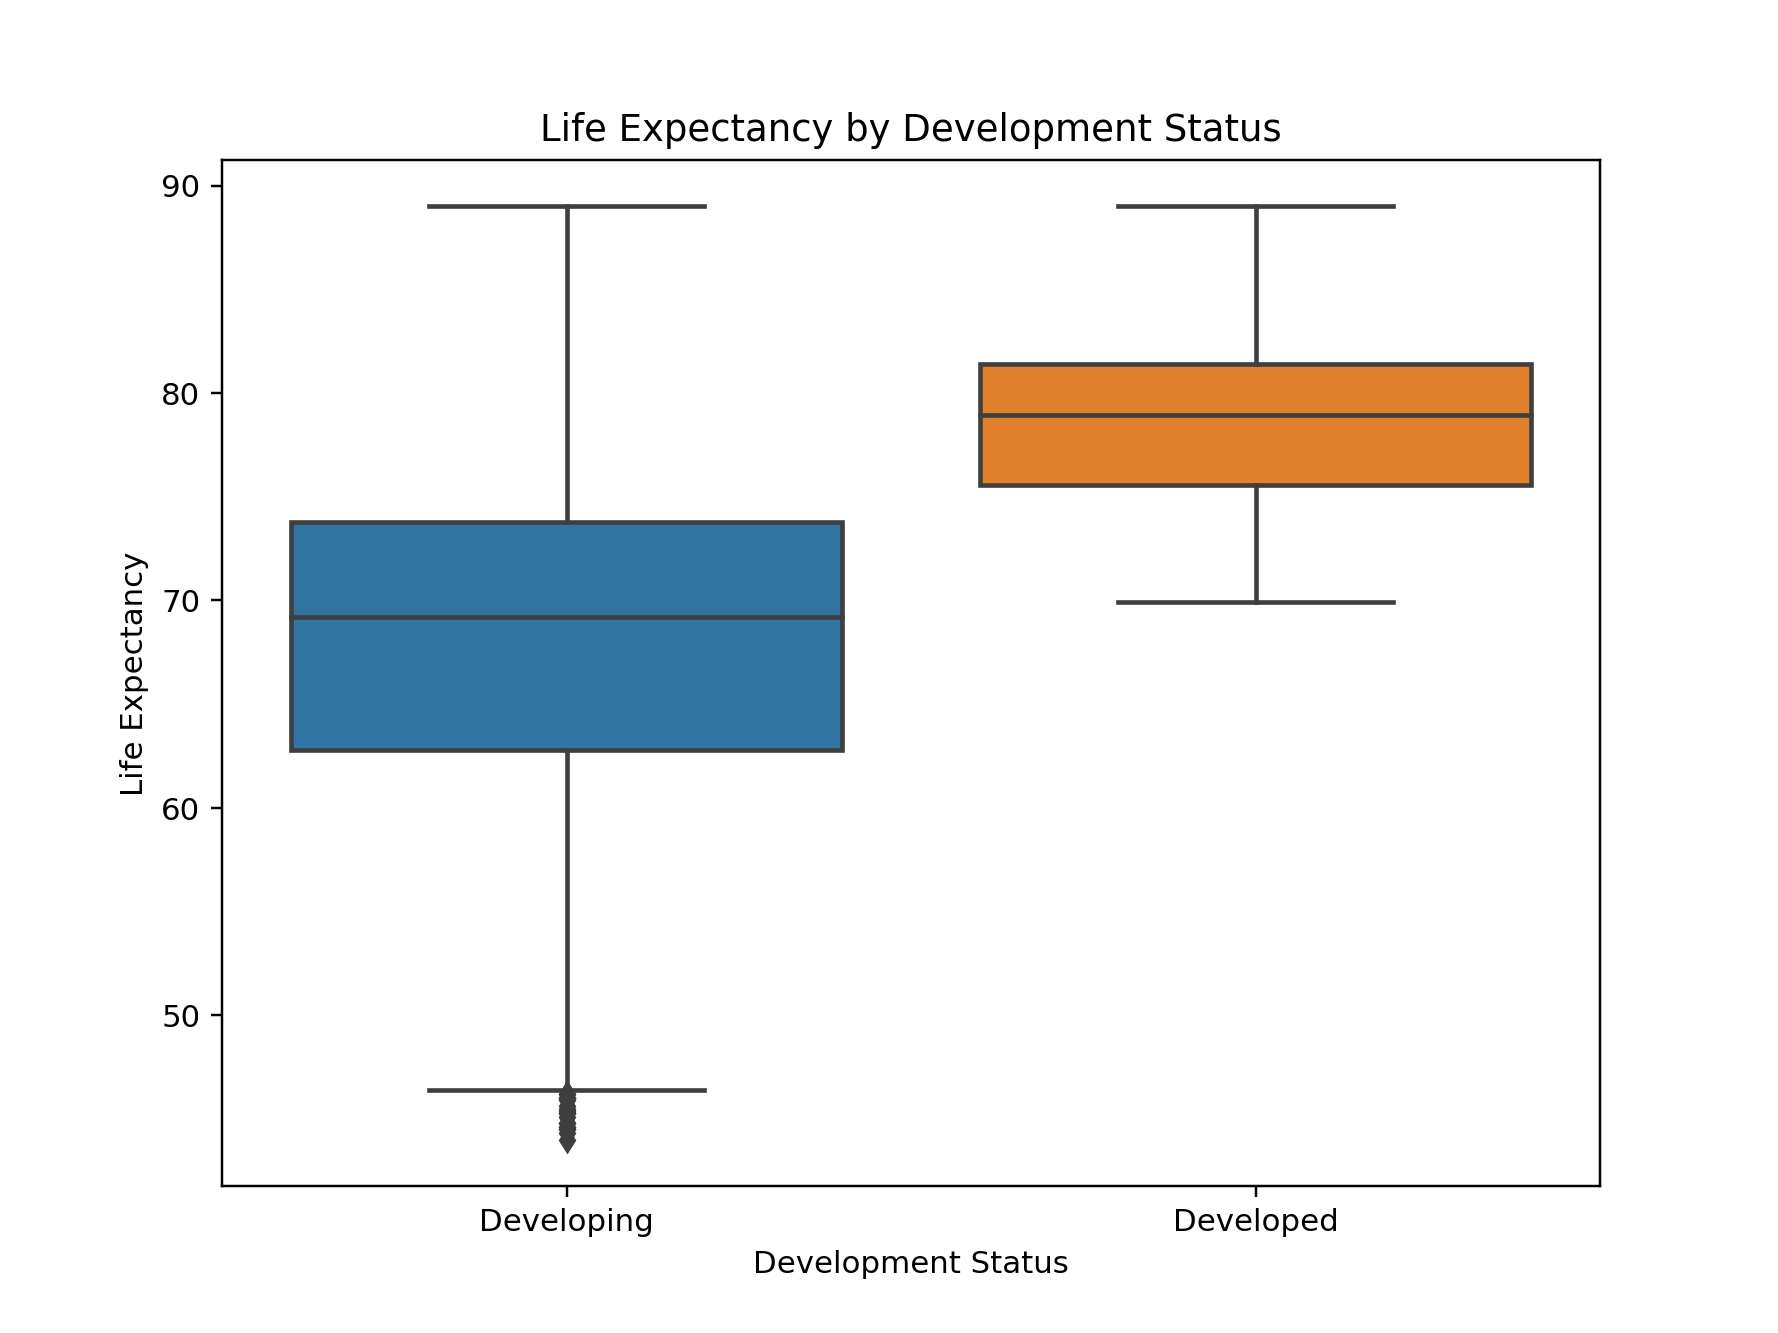

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Status', y='Life expectancy ', data=all_countries_data)
plt.xlabel('Development Status')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Development Status')
plt.show()

### Analysis of the data

Limitations:
We utilised a dataset available on Kaggle. For the purpose of analysis, the dataset offered a lot of potential. However, as we were going through the results we noticed some discrepancies which skewed our results. For the purpose of transparency, we are listing a few such issues below.

1. The Status column distinguishes Developed and Developing countries. However, in the case of Canada the Status shows Developing even though it is a Developed country. 
